# Why People Really Quit Their Jobs?
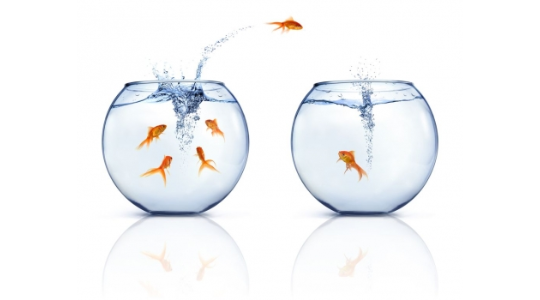


### This dataset is related to the record of the employees in the company.

* It describes the **satisfaction level** of the employee, **last evaluation** of their performance, **number of projects** they done, their **average monthly working hours**, the **number of years** spent in the company, whether the employee had a **workplace accident**, whether the employee **left the workspace** , their **last promotion**, the **department** where the employee works and the **salary level**.

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# 2. Load Data

In [2]:
hr=pd.read_csv("data/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 3. Analisys Data and Variables

Analize and understand the data in detail in order to make the right assumptions and choose the right algorithm:

* Size 
* Anlysis of descriptive statistics
* Determine variable's type
* Is there any null value?
* Find and remove duplicates
* Anlysis of descriptive statistics

In [3]:
#This dataset contains 14999 rows and 10 columns.
hr.shape

(14999, 10)

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


* "**Work_accident**", "**left**" and "**promotion_last_5years**" are _categorical variables_ and not relevant in this descriptive statistics
* "**sales**" and "**salary**" are not numerical variables so they do not appear above.

### How does it calculate the turnover ratio?
The company's turnover rate is the percentage of employees that voluntarily leave your company over a period of time.

In [6]:
#number of employees who leave the company
hr.groupby('left')['left'].count()

left
0    11428
1     3571
Name: left, dtype: int64

In [7]:
#Turn over ratio as a result of the division of the number of employee who left the company 
#by the number of total employees at the worksite 

len(hr[hr['left']==1])/len(hr)*100

23.80825388359224

In [8]:
hr.isnull().sum()
#there isn't missing data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
#Find and remove duplicates.
len(hr[hr.duplicated]==True)

3008

In [10]:
#I have valorated the size of these elements and I feel confortable removing duplicates from the data set
hr_no_dupl= hr.drop_duplicates()
hr_no_dupl.shape

(11991, 10)

In [11]:
hr_no_dupl.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Which is the turnover ratio after removing duplicates?

In [12]:
hr_no_dupl.groupby('left')['left'].count()

left
0    10000
1     1991
Name: left, dtype: int64

In [13]:
#turnover ratio:
len(hr_no_dupl[hr_no_dupl['left']==1])/len(hr_no_dupl)*100

16.604119756484028

In [14]:
#or
turnover_ratio=hr_no_dupl['left'].mean()*100
turnover_ratio

16.604119756484028

### Let's start by taking a look at **people who stay** and **people who leave** the company

In [15]:
#some definitions:
people_who_stay= hr_no_dupl[hr_no_dupl['left']==0]
people_who_leave= hr_no_dupl[hr_no_dupl['left']==1]

In [16]:
#sanity check
print(len(people_who_stay))
print(len(people_who_leave))

10000
1991


In [17]:
hr_no_dupl.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


At a glance:

* It make sense that average of satisfaction_level and promotion_last_5years in people who stay is higher.But, is having an accident a key factor to stay at company?
* On the other hand, the average of number_project, average_montly_hours and time_spend_company is slightly higher in people who leave the company.
* Finally, the average of last_evaluation is quite similar among both groups. Does it make sense?

### Could we know which variable has the most influence to stay or leave a job?

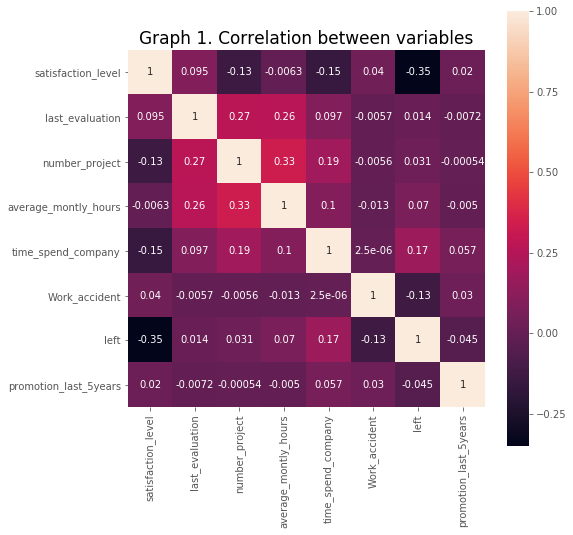

In [18]:
# Correlation heatmap
plt.figure(figsize=(8, 8))  
sns.heatmap(hr_no_dupl.corr(), vmax=1, square=True,annot=True) 
plt.title("Graph 1. Correlation between variables", fontsize = 17)
plt.show()

#### Graph 1:  

* As expected, the **"satisfaction level" has the largest correlation with the decision to stay or leave** the company (-0.35). Between "Work_accident" and "left" column there is also a negative correlation (-0.13) whereas with the "time_spend_company" it is positive (0.17). 

Graph 1 also shows _the Pearson's correlation coefficient among features_: 

* There is a **negative correlation** coefficient (-0.15) between **"average_montly_hours" and "satisfaction_level"** . __It seems to indicate that people value enjoy more free time.__


* However,  it also shows a __strong and positive correlation__ among __'last_evaluation'  with 'number_project' and "average_montly_hours"__. It could  indicate that the __company recognizes and values their employees' capacity and dedication at work.__


# 4. Some quick visualitations 

### 4.1 Headcount

In [26]:
total_employees_by_department= hr_no_dupl.groupby('sales')['left'].count().sort_values(ascending=False)
total_employees_by_department

sales
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: left, dtype: int64

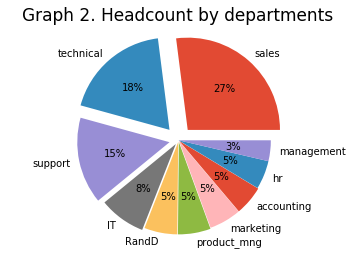

In [28]:
#Graph
explode=(0.15,0.15,0.1,0.05,0.02,0.02,0.01,0.01,0,0) #highlight the 4 main values
plt.pie(total_employees_by_department,labels=total_employees_by_department.index,autopct='%1d%%',explode=explode) #use of autopct to display the percent value 
plt.title("Graph 2. Headcount by departments", fontsize = 17)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 4.2 Turn Over Ratio

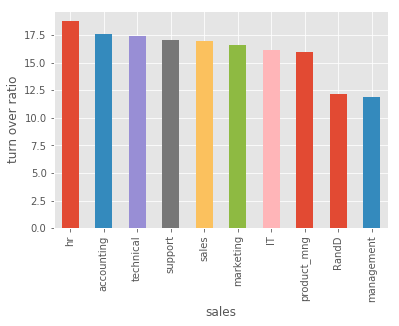

In [108]:
#Turnover ratio:
TurnoverRatio_by_department= np.round((people_who_leave_by_department/total_employees_by_department)*100,decimals=1)
TurnoverRatio_by_department.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('turn over ratio')
plt.show()

Conclusions:

* Human Resouces,Accounting, Technical, Support and Sales are above average 
* Managment far below the average, probably (don't know yet) because their salaries were higher

### 4.2 Accidents at work

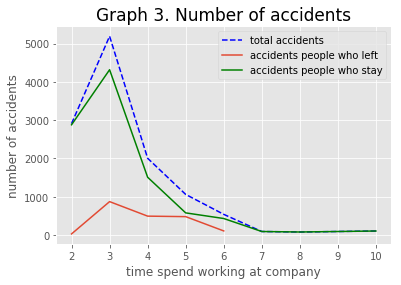

In [23]:
accidents_by_year=hr_no_dupl.groupby('time_spend_company')['Work_accident'].count()
plt.plot(accidents_by_year,'b--',label='total accidents')
plt.plot(people_who_leave.groupby('time_spend_company')['Work_accident'].count(),label='accidents people who left')
plt.plot(people_who_stay.groupby('time_spend_company')['Work_accident'].count(),label='accidents people who stay',color='green')
plt.xlabel('time spend working at company')
plt.ylabel('number of accidents')
plt.legend()
plt.title("Graph 3. Number of accidents", fontsize = 17)
plt.show()

* Graph 3 shows that:
    - the higher number of accidents take place during the third year working at company
    - people who left has less accidents than people who stay

In [24]:
hr_no_dupl.groupby('Work_accident').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years
Work_accident,,,,,,,
0,0.625546,0.717092,3.805640,200.741150,3.364856,0.185978,0.015284
1,0.652200,0.714438,3.787568,199.006486,3.364865,0.056757,0.025946


* In relation with other features, if I compare people who have accident and people who don't have, I realize that there are no material differences among them. I mean, the values are quite similar.

### 4.3 Salary

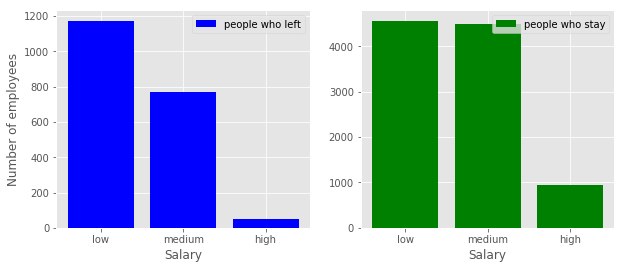

In [40]:
X=hr_no_dupl['salary'].unique()
Y1=people_who_leave.groupby(['salary'])['left'].count().reset_index().sort_values('left', ascending=False ).left.values
Y2=people_who_stay.groupby(['salary'])['left'].count().reset_index().sort_values('left', ascending=False ).left.values


figure, axs = plt.subplots(ncols=2)

axs[0].bar(X, Y1,color='blue')
axs[1].bar(X, Y2,color='green')
axs[0].set_ylabel('Number of employees')
axs[0].set_xlabel('Salary')
axs[1].set_xlabel('Salary')

figure.set_size_inches(10,4)

axs[0].legend(['people who left'])

axs[1].legend(['people who stay'])

plt.show()


*  A higher number of employees left in the low salary group compared to the high salary group

### 4.4 Employee satisfaction level?

In [29]:
print('Mean satisfaction of employees is %.f percent'%(hr_no_dupl.satisfaction_level.mean()*100)) 
print('Mean satisfaction of employees who leave is %.f percent' %(people_who_leave.satisfaction_level.mean()*100))
print('Mean satisfaction of employees who stay is %.f percent' %(people_who_stay.satisfaction_level.mean()*100))

Mean satisfaction of employees is 63 percent
Mean satisfaction of employees who leave is 44 percent
Mean satisfaction of employees who stay is 67 percent


*  Satisfaction level is quite higher in employees stayed the company than employees who left

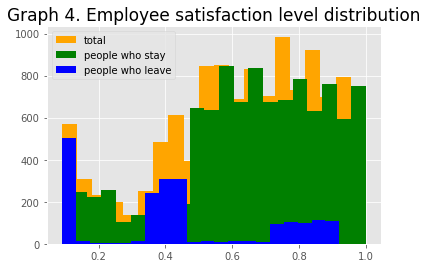

In [42]:
plt.hist(hr_no_dupl.satisfaction_level,bins=20,color='orange',label='total') 
plt.hist(people_who_stay.satisfaction_level,bins=20,color='green',label='people who stay',) #people who stay
plt.hist(people_who_leave.satisfaction_level,bins=20,color='blue',label='people who leave') #people who leave
plt.title("Graph 4. Employee satisfaction level distribution", fontsize = 17)
plt.legend()
plt.show()

In [ ]:
#Grafico con salarios y satisfacción

* Employees in high salary group have lower satisfaction level compared to the low and medium group whether they leave or stay
* Employees who left have lower satisfaction level in each salary tranche.

# 5. Data quality issues 

In [398]:
hr_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
Work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
sales                    11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


After a quick review of the dataset I realise some issues such that:

* To deal better with ML algorithms and statistics the features must have a NUMERICAL value. Therefore ,some **features (sales and salary)** will be transformed to numerical.


- **left** : as "target" column, it should occupy the last position in the dataframe. It will be moved to there.

**1. Convert to numerical** : "salary" and "sales"

In [399]:
hr_no_dupl['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [400]:
#Dummy Coding
hr_salary = pd.get_dummies(hr_no_dupl['salary'])
hr_salary.sample(10)

,high,low,medium
5899,0,0,1
11563,0,1,0
3060,0,1,0
9692,0,0,1
5350,0,1,0
10021,0,1,0
9581,0,0,1
10326,0,0,1
9364,0,1,0
6104,0,0,1


In [401]:
#join
hr2=pd.merge(hr_no_dupl,hr_salary,left_index=True, right_index=True)
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [402]:
#Now it is the turn of "department" 
hr2['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [403]:
hr_department= hr2['sales'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'], 
                                  [0,1,2,3,4,5,6,7,8,9],#new values
                                 inplace = False) #it will be modified in place
hr_department

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
11970    8
11971    1
11972    1
11973    6
11974    6
11975    5
11976    8
11977    8
11978    8
11979    0
11980    0
11981    0
11982    0
11983    0
11984    0
11985    0
11986    6
11987    7
11988    7
11989    7
11990    7
11991    6
11992    6
11993    5
11994    5
11995    5
11996    5
11997    5
11998    8
11999    6
Name: sales, Length: 11991, dtype: int64

In [404]:
#finally, we include this values into the dataFrame as "department_numeric" columnn
hr2['department_numeric']=hr_department
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,high,low,medium,department_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0,0


In [405]:
#Now, I can remove "sales" and "salary" columns from DataFrame.Therefore it will include only numeric features
hr_numeric=hr2.drop(columns=['sales','salary'])
hr_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,medium,department_numeric
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0


**2.Change the order of columns**: "left" column as "target" will be moved to the final of the data frame

In [406]:
cols = hr_numeric.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'department_numeric']

In [407]:
#Now "left" column will be the last one
cols_new = cols[:6]+cols[7:]+cols[6:7]
cols_new

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'department_numeric',
 'left']

In [408]:
#finally, it's included in the new dataframe called: hr_data
hr_data= hr_numeric[cols_new]
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium,department_numeric,left
0,0.38,0.53,2,157,3,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,0,1


In [409]:
#check values' type: 
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 12 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
Work_accident            11991 non-null int64
promotion_last_5years    11991 non-null int64
high                     11991 non-null uint8
low                      11991 non-null uint8
medium                   11991 non-null uint8
department_numeric       11991 non-null int64
left                     11991 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 1.3 MB


# 5. Machine Learning

This is a problem of classification where what I am looking for is to identifying whether the employee is living the company or not.

In [410]:
hr_data.shape

(11991, 12)

In [411]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'department_numeric',
       'left'],
      dtype='object')

In [412]:
x=hr_data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'department_numeric']] #X will be the features
y=hr_data['left'] #left column will be the target one (1=left, 0 =stay)

In [413]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [414]:
#We check to ensure we have the desired 70% train, 30% split of the data
print("{0:0.2f}% in training set".format((len(x_train)/len(hr_data.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(hr_data.index)) * 100))

66.99% in training set
33.01% in test set
